In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
import pandas as pd


Số lượng ảnh trong thư mục Cercis chinensis: 72
Số lượng ảnh trong thư mục Indigofera tinctoria: 73
Số lượng ảnh trong thư mục Acer palmatum: 56


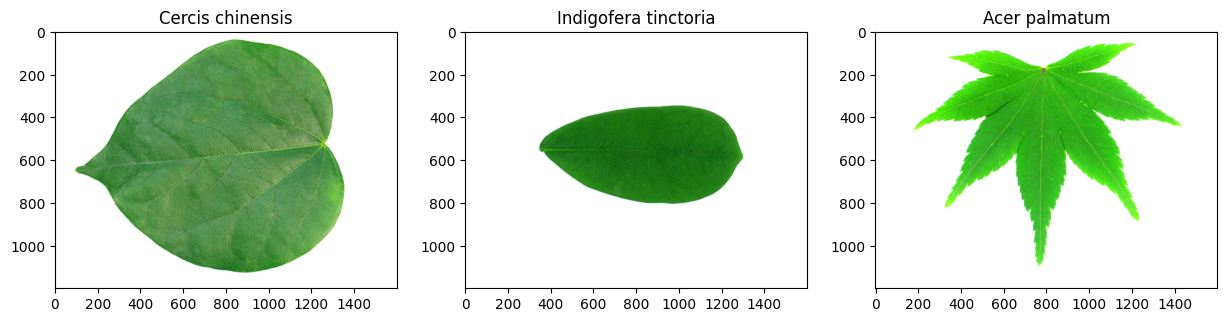

Kích thước ảnh Cercis chinensis: (1200, 1600, 3)
Kích thước ảnh Indigofera tinctoria: (1200, 1600, 3)
Kích thước ảnh Acer palmatum: (1200, 1600, 3)


In [2]:
cercis_chinesis = '../Leaf_nhom_02/4 Cercis chinensis/'
indigofera_tinctoria = '../Leaf_nhom_02/5 Indigofera tinctoria L/'
acer_palmatum = '../Leaf_nhom_02/6 Acer palmatum/'

# Hiển thị số lượng ảnh trong các thư mục
def count_images(path):
    import os
    list = os.listdir(path)
    return len(list)

print('Số lượng ảnh trong thư mục Cercis chinensis:', count_images(cercis_chinesis))
print('Số lượng ảnh trong thư mục Indigofera tinctoria:', count_images(indigofera_tinctoria))
print('Số lượng ảnh trong thư mục Acer palmatum:', count_images(acer_palmatum))

# Đọc ảnh trong folder
def read_images(path):
    import os
    list = os.listdir(path)
    images = []
    for i in list:
        images.append(plt.imread(path + i))
    return images

# Hiển thị ảnh đầu tiên của mỗi loại
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(read_images(cercis_chinesis)[0])
axs[0].set_title('Cercis chinensis')

axs[1].imshow(read_images(indigofera_tinctoria)[0])
axs[1].set_title('Indigofera tinctoria')

axs[2].imshow(read_images(acer_palmatum)[0])
axs[2].set_title('Acer palmatum')

plt.subplots_adjust(wspace=0.2)  # Điều chỉnh khoảng cách giữa các biểu đồ
plt.show()

# Hiển thị kích thước 1 ảnh đầu tiên
print('Kích thước ảnh Cercis chinensis:', read_images(cercis_chinesis)[0].shape)
print('Kích thước ảnh Indigofera tinctoria:', read_images(indigofera_tinctoria)[0].shape)
print('Kích thước ảnh Acer palmatum:', read_images(acer_palmatum)[0].shape)

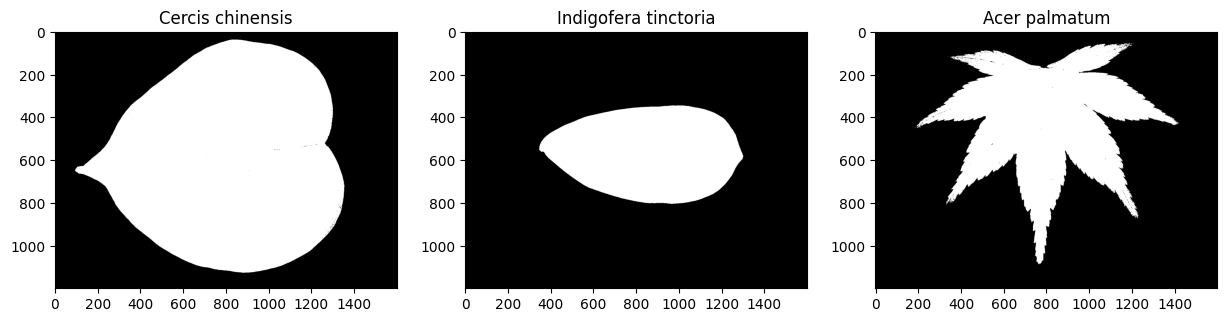

In [6]:
# Đọc ảnh trong từng thư mục và chuyển sang ảnh xám, tạo vào lưu file ảnh xám vào folder mới
def preprocessing(image):
    gray_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # resize ảnh với kích thước giảm 10 lần
    # gray_img = cv2.resize(gray_img, (gray_img.shape[1]//10, gray_img.shape[0]//10))
    _, gray_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    gray_img = cv2.bitwise_not(gray_img)
    return gray_img

# Hiển thị ảnh sau khi tiền xử lý
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(preprocessing(read_images(cercis_chinesis)[0]), cmap='gray')
axs[0].set_title('Cercis chinensis')

axs[1].imshow(preprocessing(read_images(indigofera_tinctoria)[0]), cmap='gray')
axs[1].set_title('Indigofera tinctoria')

axs[2].imshow(preprocessing(read_images(acer_palmatum)[0]), cmap='gray')
axs[2].set_title('Acer palmatum')

plt.subplots_adjust(wspace=0.2)  # Điều chỉnh khoảng cách giữa các biểu đồ
plt.show()

    

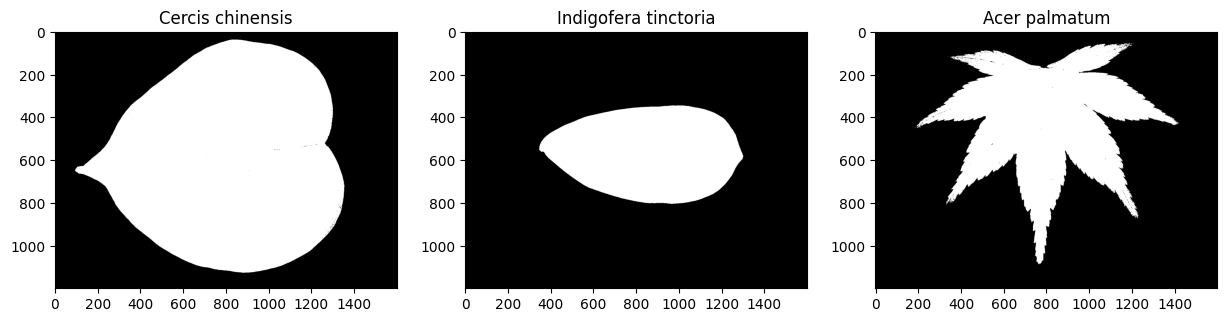

In [8]:
cercis_chinesis_img = read_images(cercis_chinesis)
indigofera_tinctoria_img = read_images(indigofera_tinctoria)
acer_palmatum_img = read_images(acer_palmatum)

# Tiền xử lý ảnh và lưu vào thư mục mới với tên giống ảnh gốc
cercis_chinesis_preprocessing = '../HU_nhom_02/preprocessing/cercis_chinesis_preprocess/'
indigofera_tinctoria_preprocessing = '../HU_nhom_02/preprocessing/indigofera_tinctoria_preprocess/'
acer_palmatum_preprocessing = '../HU_nhom_02/preprocessing/acer_palmatum_preprocess/'

if not os.path.exists(cercis_chinesis_preprocessing):
    os.makedirs(cercis_chinesis_preprocessing)
if not os.path.exists(indigofera_tinctoria_preprocessing):
    os.makedirs(indigofera_tinctoria_preprocessing)
if not os.path.exists(acer_palmatum_preprocessing):
    os.makedirs(acer_palmatum_preprocessing)

for i in range(len(cercis_chinesis_img)):
    cv2.imwrite(cercis_chinesis_preprocessing + 'cercis_chinesis_preprocess_' + str(i) + '.png', preprocessing(cercis_chinesis_img[i]))
for i in range(len(indigofera_tinctoria_img)):
    cv2.imwrite(indigofera_tinctoria_preprocessing + 'indigofera_tinctoria_preprocess_' + str(i) + '.png', preprocessing(indigofera_tinctoria_img[i]))
for i in range(len(acer_palmatum_img)):
    cv2.imwrite(acer_palmatum_preprocessing + 'acer_palmatum_preprocess_' + str(i) + '.png', preprocessing(acer_palmatum_img[i]))

# Hiển thị ảnh sau khi tiền xử lý
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(plt.imread(cercis_chinesis_preprocessing + 'cercis_chinesis_preprocess_0.png'), cmap='gray')
axs[0].set_title('Cercis chinensis')

axs[1].imshow(plt.imread(indigofera_tinctoria_preprocessing + 'indigofera_tinctoria_preprocess_0.png'), cmap='gray')
axs[1].set_title('Indigofera tinctoria')

axs[2].imshow(plt.imread(acer_palmatum_preprocessing + 'acer_palmatum_preprocess_0.png'), cmap='gray')
axs[2].set_title('Acer palmatum')

plt.subplots_adjust(wspace=0.2)  # Điều chỉnh khoảng cách giữa các biểu đồ
plt.show()



In [11]:
# Trích đặc trưng HU của ảnh và lưu vào file csv
# Gán nhãn cho đặc trưng
# Cercis chinensis: 4
# Indigofera tinctoria: 5
# Acer palmatum: 6

def extract_feature(image):
    moments = cv2.moments(image)
    hu_moments = cv2.HuMoments(moments)
    return hu_moments.flatten()

def extract_feature_from_folder(path, label):
    list = os.listdir(path)
    features = []
    labels = []
    for i in list:
        img = plt.imread(path + i)
        features.append(extract_feature(img))
        labels.append(label)
    return features, labels

def save_to_csv(features, labels, file_name):
    df = pd.DataFrame(features)
    df['label'] = labels
    df.to_csv(file_name, index=False)

cercis_chinesis_features, cercis_chinesis_labels = extract_feature_from_folder(cercis_chinesis_preprocessing, 4)
indigofera_tinctoria_features, indigofera_tinctoria_labels = extract_feature_from_folder(indigofera_tinctoria_preprocessing, 5)
acer_palmatum_features, acer_palmatum_labels = extract_feature_from_folder(acer_palmatum_preprocessing, 6)

# Lưu vào file csv đặt tên file là HU_nhom_02.csv
features = cercis_chinesis_features + indigofera_tinctoria_features + acer_palmatum_features
labels = cercis_chinesis_labels + indigofera_tinctoria_labels + acer_palmatum_labels
save_to_csv(features, labels, 'HU_nhom_02.csv')

